<h1 style = "color : Sky blue"> Plotting Exercise(Numpy Attributes)</h1>

As you learnt in the session, data visualisation is an essential skill for a data scientist to have. Charts and graphs are the easiest way to communicate data to different kinds of consumers. The assessments in this notebook will test your ability to represent information. The questions will be investigative and will not have detailed instructions about the execution; you will have to figure that part out yourself. Don't worry, there are no wrong answers here, only happy accidents. Try these questions on your own, to verify if you have done the task correctly, look at the solution as a person who does not know the data and is looking at it for the first time. You will be able to identify better ways to represent data automatically.  

The dataset given for this notebook is the pricing data for diamonds based on the carat, cut, colour and so on. Take a look at the data below and also the data dictionary for a better understanding of the data and the attributes. 

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data into a dataframe
data = pd.read_csv("Dataset/diamonds.csv", header = 0)

# As a preparatory step, let's drop Unnamed column.
data = data.drop("Unnamed: 0", axis =1 )

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data Dictionary: 

1. **carat**: Weight of the diamond (0.2--5.01)

2.  **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

3. **color**: Diamond colour, from J (worst) to D (best)

4. **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

5. **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

6. **table**: Width of top of diamond relative to widest point (43--95)

7. **price**: Price in US dollars (326 dollars -18,823 dollars)

8. **x**: Length in mm (0--10.74)

9. **y**: Width in mm (0--58.9)

10. **z**: Depth in mm (0--31.8)

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of prices of diamonds and note your observations. 

In [3]:
data.pivot_table(index=['price'],values=['carat','depth','table','x','y','z']).sort_values(by=['price'])

,carat,depth,table,x,y,z
price,,,,,,
326,0.22,60.65,58.0,3.920,3.91,2.370
327,0.23,56.90,65.0,4.050,4.07,2.310
334,0.29,62.40,58.0,4.200,4.23,2.630
335,0.31,63.30,58.0,4.340,4.35,2.750
336,0.24,62.55,57.0,3.945,3.97,2.475
...,...,...,...,...,...,...
18803,2.00,62.80,57.0,7.950,8.00,5.010
18804,2.07,62.50,55.0,8.200,8.13,5.110
18806,1.51,61.70,55.0,7.370,7.41,4.560


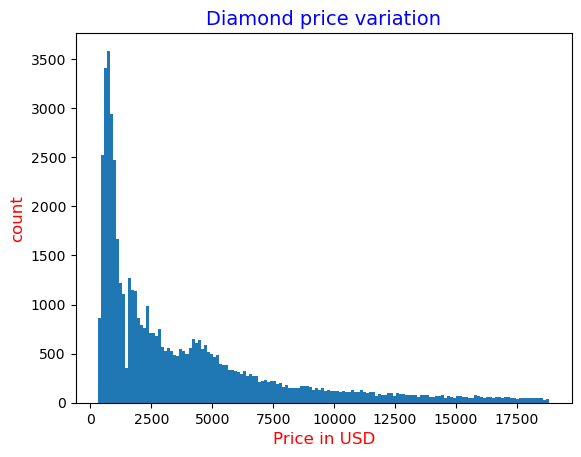

In [16]:
# An histogram to show the frequency of prices

plt.title('Diamond price variation',fontdict={'color':'blue','fontsize':14})
plt.xlabel('Price in USD',{'color':'red','fontsize':12})
plt.ylabel('count',{'color':'red','fontsize':12})


# Manage xticks
xTicks = list(map( lambda x: x//1000 ,data['price']))
plt.hist(data['price'],bins=150)

plt.show()

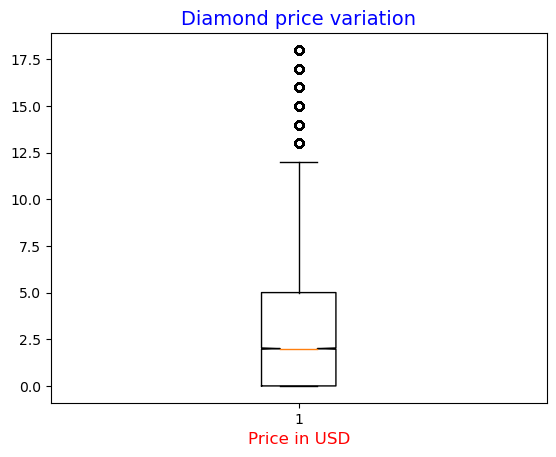

In [32]:
# A box plot can also show the distribution of data
plt.title('Diamond price variation',fontdict={'color':'blue','fontsize':14})
plt.xlabel('Price in USD',{'color':'red','fontsize':12})
plt.boxplot(xTicks,'flierprops=red_square')
plt.show()


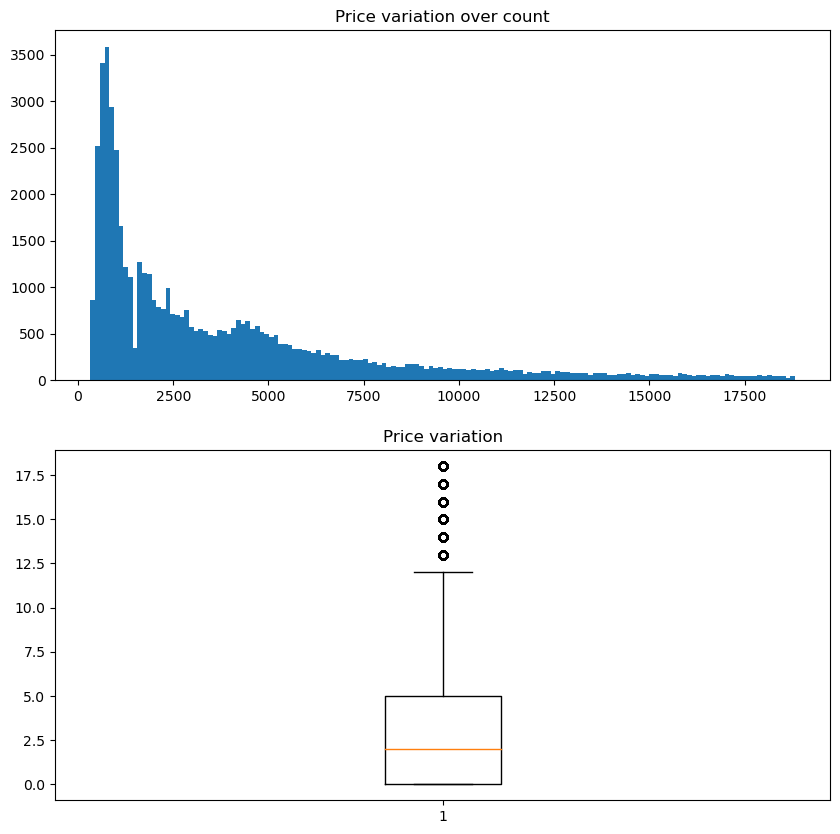

In [37]:
# We can try to create a subplot of 2 boxes and can show both box and histogram
import matplotlib.pyplot as plt
import numpy as np 

fig,ax = plt.subplots(nrows=2,ncols=1,sharex=False,sharey=False)
fig.set_size_inches(10,10)

# First histogram

ax[0].set_title('Price variation over count')
ax[0].hist(data['price'],bins=150)


xTicks = list(map( lambda x: x//1000 ,data['price']))

# Second box chart
ax[1].set_title('Price variation')
ax[1].boxplot(xTicks)

plt.show() 





<h3 style = "color : Brown"> Question </h3>

Perform a similar variation analysis on the quality of cut. 

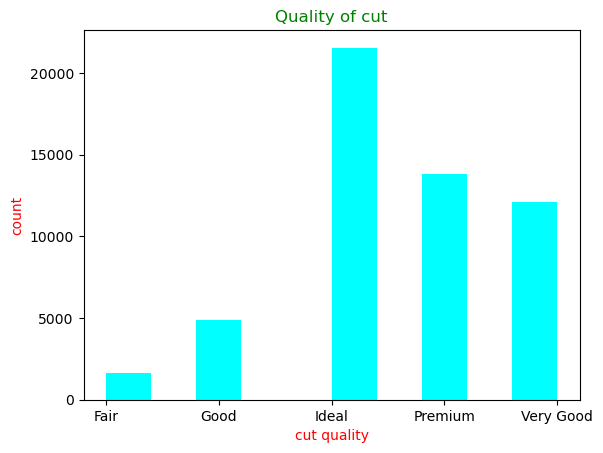

In [12]:
cutdata = data['cut'].sort_values()
plt.hist(cutdata,color='cyan')
plt.xlabel('cut quality',fontdict={'color':'red','fontweight':10})
plt.ylabel('count',fontdict={'color':'red','fontweight':10})
plt.title('Quality of cut',fontdict={'color':'green','fontweight':14})
plt.show()

<h3 style = "color : Brown"> Question </h3>

Represent the same information as above in a pie chart.

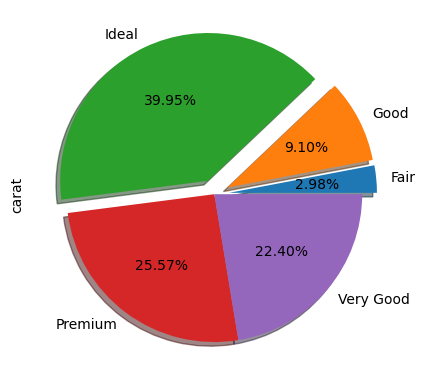

In [60]:
cutdataCount = data.groupby(by=['cut']).count()
cutdataCount['carat'].plot.pie(shadow=True,autopct='%2.2f%%',explode=(.1,0.1,.1,0,0))
plt.show()

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of price of the diamonds, with respect to the carats. 

Text(0, 0.5, 'carrat')

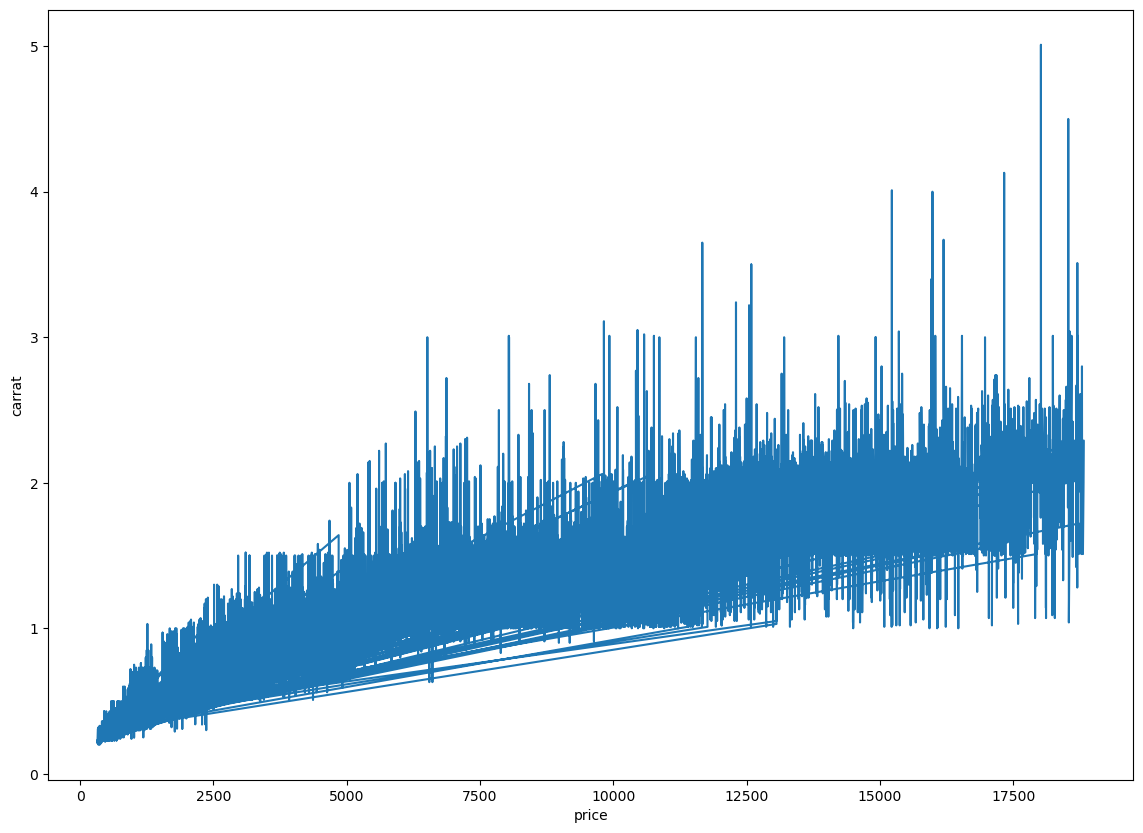

In [71]:
plt.figure(figsize = [14,10])
plt.plot(data['price'],data['carat'])
plt.xlabel('price')
plt.ylabel('carrat')


<h3 style = "color : Brown"> Question </h3>

Investigate the relationship of price with respect to the cut of the diamonds. 

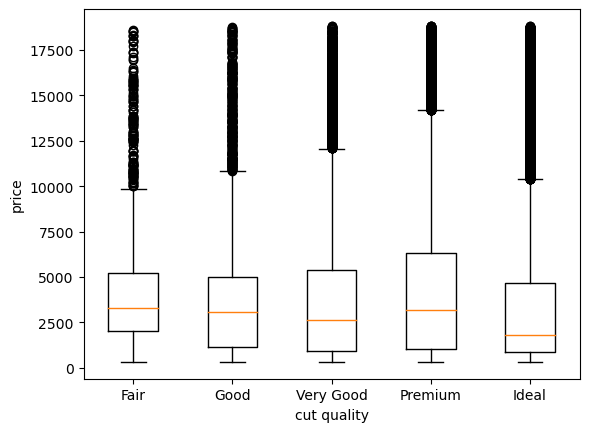

In [18]:
data_fair = data[data['cut'] == 'Fair']
data_good = data[data['cut'] == 'Good']
data_vgood = data[data['cut'] == 'Very Good']
data_premium = data[data['cut'] == 'Premium']
data_ideal = data[data['cut'] == 'Ideal']

plt.boxplot([data_fair['price'], data_good['price'], data_vgood['price'], data_premium['price'], data_ideal['price']])
plt.xticks((1,2,3,4,5),('Fair', 'Good' ,'Very Good' ,'Premium' ,'Ideal' ))
plt.xlabel('cut quality')
plt.ylabel('price')
plt.show()

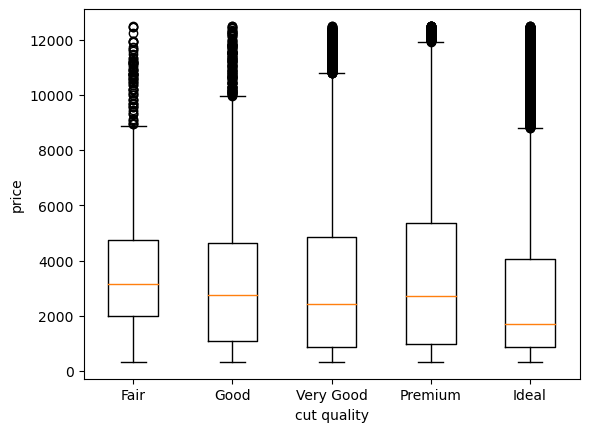

In [20]:
# Any price beyond 12500 is outlier
data_in_range = data[  data['price'] <=12500]

data_fair = data_in_range[data_in_range['cut'] == 'Fair']
data_good = data_in_range[data_in_range['cut'] == 'Good']
data_vgood = data_in_range[data_in_range['cut'] == 'Very Good']
data_premium = data_in_range[data_in_range['cut'] == 'Premium']
data_ideal = data_in_range[data_in_range['cut'] == 'Ideal']

plt.boxplot([data_fair['price'], data_good['price'], data_vgood['price'], data_premium['price'], data_ideal['price']])
plt.xticks((1,2,3,4,5),('Fair', 'Good' ,'Very Good' ,'Premium' ,'Ideal' ))
plt.xlabel('cut quality')
plt.ylabel('price')
plt.show()

**All the best!**